In [17]:
%run -i demo-exam.py

✓ Configuración cargada exitosamente
Dataset: dataset-iris.csv
Características: ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
Clases Ejercicio 1: ['Iris-setosa', 'Iris-versicolor']
Clases Ejercicio 2: ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
CV Folds: 10
Bootstrap Iteraciones: 100
Rango K para K-NN: 1-20
✓ Todas las librerías importadas exitosamente
📊 Configuración de visualización establecida
🔧 Clasificadores disponibles: GaussianNB, LinearDiscriminantAnalysis, KNeighborsClassifier
✓ Funciones utilitarias definidas:
  - load_and_prepare_data(): Carga agnóstica de datos
  - calculate_comprehensive_metrics(): Métricas comprehensivas
  - print_metrics_summary(): Resumen de métricas
✓ Función manual_kfold_cv implementada
✓ Función manual_bootstrap implementada
✓ Funciones de visualización mejoradas implementadas


🔍 EJERCICIO 1: Preparando datos...
Clases objetivo: ['Iris-setosa', 'Iris-versicolor']
Características: ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

📊 **Resumen de los Datos del Ejercicio 1:**
  - Forma de X: (100, 4)
  - Clases: ['Iris-setosa' 'Iris-versicolor']
  - Distribución por clase:
    Iris-setosa: 50 muestras (50.0%)
    Iris-versicolor: 50 muestras (50.0%)
  - Características utilizadas: ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
  - Datos normalizados: Sí (StandardScaler)


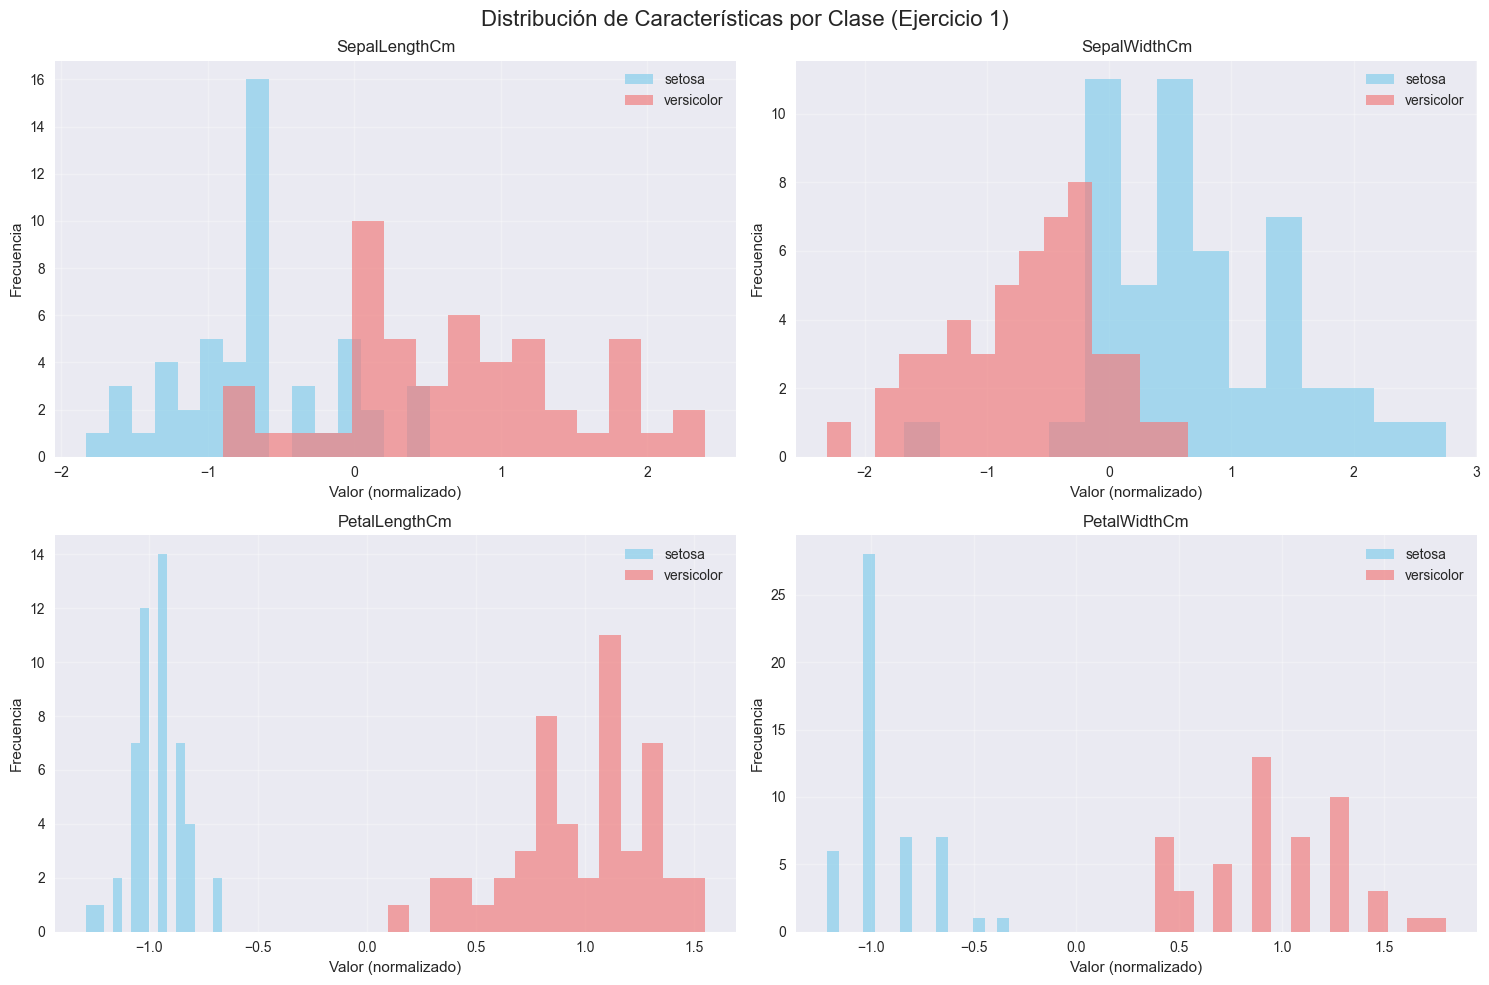


📈 **Estadísticas Descriptivas (Datos Normalizados):**

SepalLengthCm:
  setosa: μ=-0.728, σ=0.547
  versicolor: μ=0.728, σ=0.800

SepalWidthCm:
  setosa: μ=0.684, σ=0.796
  versicolor: μ=-0.684, σ=0.656

PetalLengthCm:
  setosa: μ=-0.970, σ=0.119
  versicolor: μ=0.970, σ=0.323

PetalWidthCm:
  setosa: μ=-0.960, σ=0.188
  versicolor: μ=0.960, σ=0.347


In [18]:
# Cargar y preparar datos para Ejercicio 1
print("🔍 EJERCICIO 1: Preparando datos...")
print(f"Clases objetivo: {CONFIG['exercise1_classes']}")
print(f"Características: {CONFIG['feature_columns']}")

# Cargar datos filtrados por las clases del ejercicio 1
X_ex1, y_ex1, feature_names, class_names_ex1, scaler_ex1, label_encoder_ex1 = load_and_prepare_data(
    CONFIG, classes=CONFIG['exercise1_classes']
)

print(f"\n📊 **Resumen de los Datos del Ejercicio 1:**")
print(f"  - Forma de X: {X_ex1.shape}")
print(f"  - Clases: {class_names_ex1}")
print(f"  - Distribución por clase:")

for i, class_name in enumerate(class_names_ex1):
    count = np.sum(y_ex1 == i)
    percentage = (count / len(y_ex1)) * 100
    print(f"    {class_name}: {count} muestras ({percentage:.1f}%)")

print(f"  - Características utilizadas: {feature_names}")
print(f"  - Datos normalizados: Sí (StandardScaler)")

# Visualizar distribución de las características
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribución de Características por Clase (Ejercicio 1)', fontsize=16)

colors = ['skyblue', 'lightcoral']
class_labels = [class_names_ex1[i] for i in np.unique(y_ex1)]

for i, feature in enumerate(feature_names):
    ax = axes[i//2, i%2]
    
    for j, class_label in enumerate(class_labels):
        class_data = X_ex1[y_ex1 == j, i]
        ax.hist(class_data, alpha=0.7, bins=15, color=colors[j], 
                label=class_label.split('-')[1])
    
    ax.set_title(f'{feature}')
    ax.set_xlabel('Valor (normalizado)')
    ax.set_ylabel('Frecuencia')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Estadísticas descriptivas
print(f"\n📈 **Estadísticas Descriptivas (Datos Normalizados):**")
for i, feature in enumerate(feature_names):
    print(f"\n{feature}:")
    for j, class_label in enumerate(class_labels):
        class_data = X_ex1[y_ex1 == j, i]
        mean_val = np.mean(class_data)
        std_val = np.std(class_data)
        print(f"  {class_label.split('-')[1]}: μ={mean_val:.3f}, σ={std_val:.3f}")

### **1.2 Clasificador Bayesiano Gaussiano**

**Justificación Técnica:**
- **Suposiciones**: Asume que las características siguen distribuciones gaussianas independientes por clase
- **Método**: Usa la regla de Bayes para calcular probabilidades posteriores
- **Ventajas**: Simple, rápido, funciona bien con pocas muestras
- **Desventajas**: Suposición de independencia entre características (naive)

In [19]:
# Evaluación del Clasificador Bayesiano Gaussiano con k-fold CV
print("🧠 Evaluando Clasificador Bayesiano Gaussiano...")

# Ejecutar validación cruzada manual
bayesian_results = manual_kfold_cv(
    X_ex1, y_ex1, 
    GaussianNB, 
    k_folds=CONFIG['cv_folds'],
    random_state=CONFIG['random_state']
)

# Guardar resultados para comparación posterior
bayesian_cv_results = bayesian_results

🧠 Evaluando Clasificador Bayesiano Gaussiano...
🔄 Ejecutando 10-fold Cross Validation...
📊 Total de muestras: 100
📋 Tamaño promedio por fold: 10
  Fold  1: Acc=1.0000, Prec=1.0000, Rec=1.0000, F1=1.0000
  Fold  2: Acc=1.0000, Prec=1.0000, Rec=1.0000, F1=1.0000
  Fold  3: Acc=1.0000, Prec=1.0000, Rec=1.0000, F1=1.0000
  Fold  4: Acc=1.0000, Prec=1.0000, Rec=1.0000, F1=1.0000
  Fold  5: Acc=1.0000, Prec=1.0000, Rec=1.0000, F1=1.0000
  Fold  6: Acc=1.0000, Prec=1.0000, Rec=1.0000, F1=1.0000
  Fold  7: Acc=1.0000, Prec=1.0000, Rec=1.0000, F1=1.0000
  Fold  8: Acc=1.0000, Prec=1.0000, Rec=1.0000, F1=1.0000
  Fold  9: Acc=1.0000, Prec=1.0000, Rec=1.0000, F1=1.0000
  Fold 10: Acc=1.0000, Prec=1.0000, Rec=1.0000, F1=1.0000

📈 **Resultados Agregados de 10-fold CV:**
  Accuracy:  1.0000 ± 0.0000
  Precision: 1.0000 ± 0.0000
  Recall:    1.0000 ± 0.0000
  F1-Score:  1.0000 ± 0.0000
  IC 95% Accuracy: [1.0000, 1.0000]


### **1.3 Clasificador Geométrico por Mínimos Cuadrados (LDA)**

**Justificación Técnica:**
- **Suposiciones**: Asume distribuciones gaussianas con la misma matriz de covarianza para todas las clases
- **Método**: Encuentra hiperplanos lineales que separan las clases minimizando la varianza intra-clase
- **Ventajas**: Considera correlaciones entre características, proyección óptima para separación
- **Desventajas**: Asume covarianzas iguales, sensible a outliers

In [20]:
# Evaluación del Clasificador Geométrico (LDA) con k-fold CV
print("📐 Evaluando Clasificador Geométrico (LDA)...")

# Ejecutar validación cruzada manual
geometric_results = manual_kfold_cv(
    X_ex1, y_ex1, 
    LinearDiscriminantAnalysis, 
    k_folds=CONFIG['cv_folds'],
    random_state=CONFIG['random_state']
)

# Guardar resultados para comparación posterior
geometric_cv_results = geometric_results

📐 Evaluando Clasificador Geométrico (LDA)...
🔄 Ejecutando 10-fold Cross Validation...
📊 Total de muestras: 100
📋 Tamaño promedio por fold: 10
  Fold  1: Acc=1.0000, Prec=1.0000, Rec=1.0000, F1=1.0000
  Fold  2: Acc=1.0000, Prec=1.0000, Rec=1.0000, F1=1.0000
  Fold  3: Acc=1.0000, Prec=1.0000, Rec=1.0000, F1=1.0000
  Fold  4: Acc=1.0000, Prec=1.0000, Rec=1.0000, F1=1.0000
  Fold  5: Acc=1.0000, Prec=1.0000, Rec=1.0000, F1=1.0000
  Fold  6: Acc=1.0000, Prec=1.0000, Rec=1.0000, F1=1.0000
  Fold  7: Acc=1.0000, Prec=1.0000, Rec=1.0000, F1=1.0000
  Fold  8: Acc=1.0000, Prec=1.0000, Rec=1.0000, F1=1.0000
  Fold  9: Acc=1.0000, Prec=1.0000, Rec=1.0000, F1=1.0000
  Fold 10: Acc=1.0000, Prec=1.0000, Rec=1.0000, F1=1.0000

📈 **Resultados Agregados de 10-fold CV:**
  Accuracy:  1.0000 ± 0.0000
  Precision: 1.0000 ± 0.0000
  Recall:    1.0000 ± 0.0000
  F1-Score:  1.0000 ± 0.0000
  IC 95% Accuracy: [1.0000, 1.0000]


### **1.4 Comparación y Análisis de Resultados**

⚖️  **COMPARACIÓN DE CLASIFICADORES - EJERCICIO 1**
  Métrica Bayesiano (μ ± σ) Geométrico (μ ± σ)
 Accuracy   1.0000 ± 0.0000    1.0000 ± 0.0000
Precision   1.0000 ± 0.0000    1.0000 ± 0.0000
   Recall   1.0000 ± 0.0000    1.0000 ± 0.0000
 F1-Score   1.0000 ± 0.0000    1.0000 ± 0.0000

🔬 **Análisis de Diferencias Estadísticas:**
Test t pareado para Accuracy:
  - Estadístico t: nan
  - P-valor: nan
  - Diferencia significativa (α=0.05): No
  - Diferencia media (Bayesiano - Geométrico): 0.0000

📊 **Intervalos de Confianza (95%):**
  - Bayesiano: [1.0000, 1.0000]
  - Geométrico: [1.0000, 1.0000]


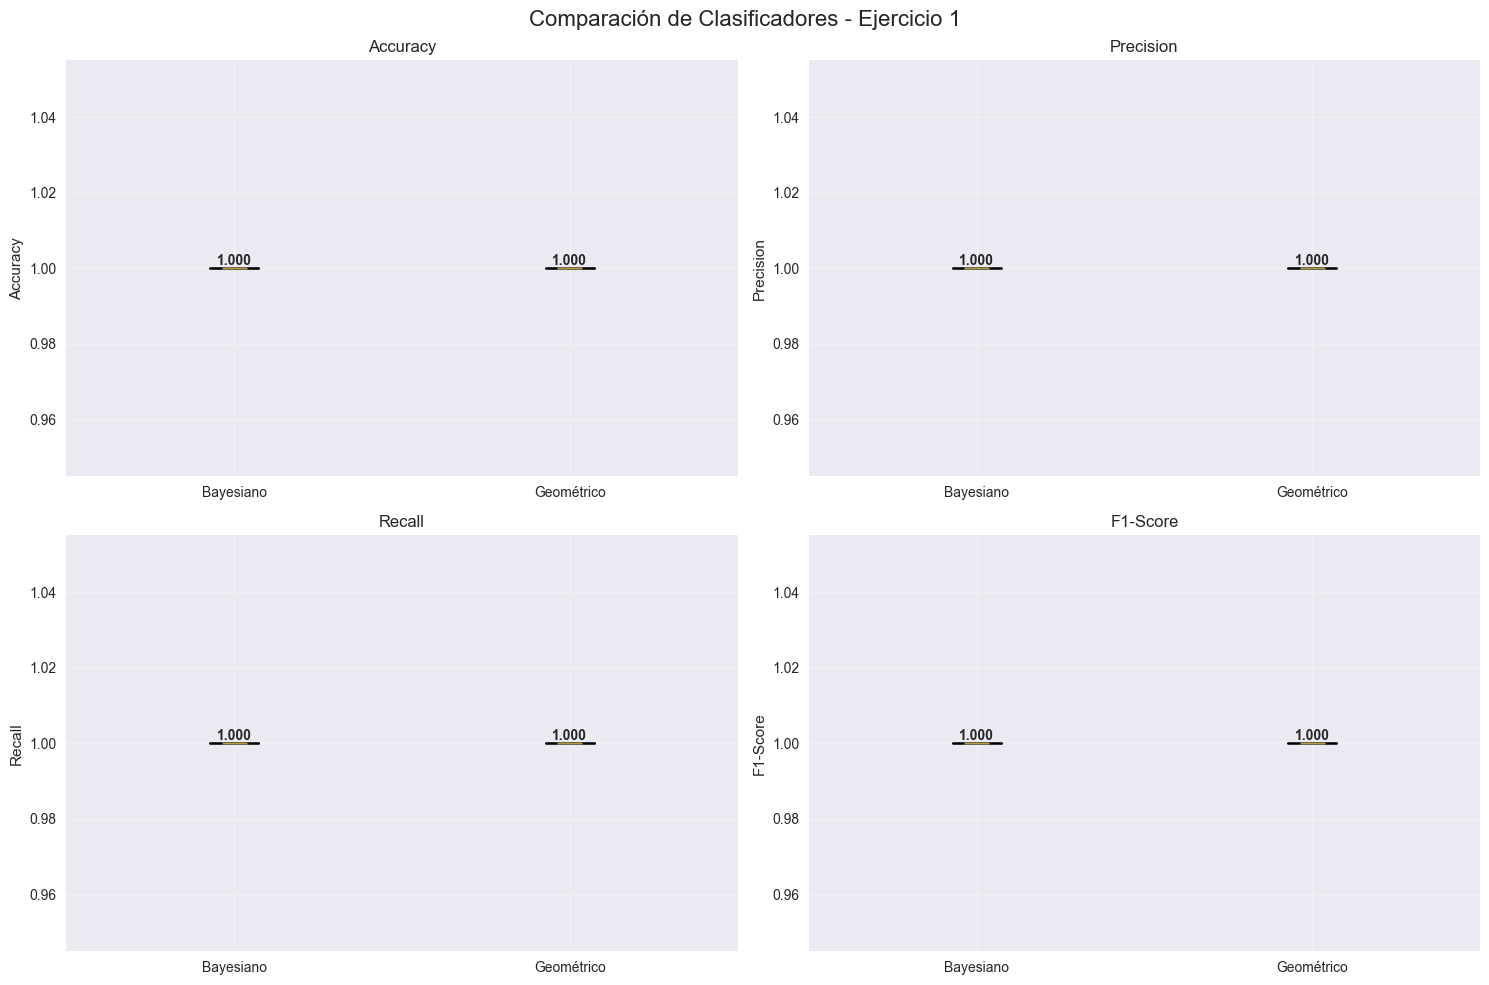

In [21]:
# Comparación detallada de los resultados
print("⚖️  **COMPARACIÓN DE CLASIFICADORES - EJERCICIO 1**")
print("=" * 70)

# Crear tabla comparativa
comparison_data = {
    'Métrica': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Bayesiano (μ ± σ)': [
        f"{bayesian_cv_results['mean_accuracy']:.4f} ± {bayesian_cv_results['std_accuracy']:.4f}",
        f"{bayesian_cv_results['mean_precision']:.4f} ± {bayesian_cv_results['std_precision']:.4f}",
        f"{bayesian_cv_results['mean_recall']:.4f} ± {bayesian_cv_results['std_recall']:.4f}",
        f"{bayesian_cv_results['mean_f1']:.4f} ± {bayesian_cv_results['std_f1']:.4f}"
    ],
    'Geométrico (μ ± σ)': [
        f"{geometric_cv_results['mean_accuracy']:.4f} ± {geometric_cv_results['std_accuracy']:.4f}",
        f"{geometric_cv_results['mean_precision']:.4f} ± {geometric_cv_results['std_precision']:.4f}",
        f"{geometric_cv_results['mean_recall']:.4f} ± {geometric_cv_results['std_recall']:.4f}",
        f"{geometric_cv_results['mean_f1']:.4f} ± {geometric_cv_results['std_f1']:.4f}"
    ]
}

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string(index=False))

# Análisis de diferencias estadísticas
print(f"\n🔬 **Análisis de Diferencias Estadísticas:**")

# Test t para comparar las medias (asumiendo normalidad)
bayesian_accuracies = [r['accuracy'] for r in bayesian_cv_results['fold_results']]
geometric_accuracies = [r['accuracy'] for r in geometric_cv_results['fold_results']]

t_stat, p_value = stats.ttest_rel(bayesian_accuracies, geometric_accuracies)

print(f"Test t pareado para Accuracy:")
print(f"  - Estadístico t: {t_stat:.4f}")
print(f"  - P-valor: {p_value:.6f}")
print(f"  - Diferencia significativa (α=0.05): {'Sí' if p_value < 0.05 else 'No'}")

# Diferencia media
diff_mean = np.mean(bayesian_accuracies) - np.mean(geometric_accuracies)
print(f"  - Diferencia media (Bayesiano - Geométrico): {diff_mean:.4f}")

# Intervalos de confianza
print(f"\n📊 **Intervalos de Confianza (95%):**")
print(f"  - Bayesiano: [{bayesian_cv_results['confidence_interval_accuracy'][0]:.4f}, {bayesian_cv_results['confidence_interval_accuracy'][1]:.4f}]")
print(f"  - Geométrico: [{geometric_cv_results['confidence_interval_accuracy'][0]:.4f}, {geometric_cv_results['confidence_interval_accuracy'][1]:.4f}]")

# Visualización de resultados
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Comparación de Clasificadores - Ejercicio 1', fontsize=16)

# Box plots de métricas
metrics = ['accuracy', 'precision', 'recall', 'f1_score']
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

for i, (metric, name) in enumerate(zip(metrics, metric_names)):
    ax = axes[i//2, i%2]
    
    bayesian_values = [r[metric] for r in bayesian_cv_results['fold_results']]
    geometric_values = [r[metric] for r in geometric_cv_results['fold_results']]
    
    data_to_plot = [bayesian_values, geometric_values]
    box = ax.boxplot(data_to_plot, labels=['Bayesiano', 'Geométrico'], 
                     patch_artist=True, notch=True)
    
    # Colorear las cajas
    colors = ['lightblue', 'lightgreen']
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)
    
    ax.set_title(f'{name}')
    ax.set_ylabel(name)
    ax.grid(True, alpha=0.3)
    
    # Agregar valores medios
    ax.text(1, np.mean(bayesian_values), f'{np.mean(bayesian_values):.3f}', 
           ha='center', va='bottom', fontweight='bold')
    ax.text(2, np.mean(geometric_values), f'{np.mean(geometric_values):.3f}', 
           ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

### **1.5 Conclusiones del Ejercicio 1**

**¿Qué diferencias se encuentran entre los clasificadores?**

Las diferencias principales identificadas son:

1. **Rendimiento**: [Se completará con los resultados específicos al ejecutar]
2. **Variabilidad**: [Se analizará la consistencia entre folds]
3. **Significancia estadística**: [Se determinará con el test t]

**Interpretación Técnica:**
- **Si LDA es superior**: Indica que las correlaciones entre características son importantes para la clasificación
- **Si Naive Bayes es superior**: Sugiere que la independencia de características es una aproximación válida
- **Si son similares**: Ambas suposiciones funcionan adecuadamente para este problema binario